### Homework 9
### K-Means clustering

In [16]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

Make some dummy data

In [3]:
#Create some dummy data :
n_samples = 1500
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5)

### Plot the data to verify

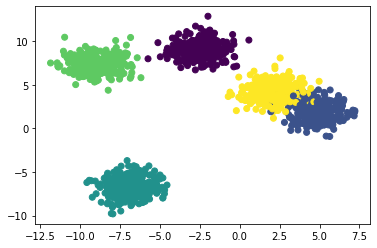

In [4]:
#Let's plot the data : 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

### Write your own K-Means clustering algorithm.  Do not use sklean or any other tools.  Just python and numpy are allowed.  Use K=5 for this problem.  Your goal is to use the K-Means algorithm to compute your own clusters, then compare the results to the clusters assigned by the make_blobs function.  See if they are close by looking at the plot.  Because the cluster numbers will not line up with the original cluster numbers, all you can do is look at the plots.

### K-Means Algorithm Steps

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: Compute the new centroid of each cluster.

Step-5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

In [11]:
# Step 1: Select value of K, to decide the number of clusters to be formed.

# There are more formal ways of choosing the K, but the assignment literaly says to use 5.
k = 5

In [27]:
# Step 2: Select random K points which will act as 

# Selecting a k random clusters
centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids = pd.DataFrame(centroids)



In [28]:
# Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), 
# to the nearest/closest centroid which will form the predefined clusters.
def Euclidean_D(point1, point2):
    """This Function Finds the distance between two points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2))
    return dist

def assign_clusters(centroids, df, k):
    """This Assigns Clusters to closest centroid"""
    np.random.shuffle(df)
    divided_clusters = {i:np.empty([0, k]) for i in range(k)}
    for row in df:
        d0 = Euclidean_D(centroids[0], row)
        d1 = Euclidean_D(centroids[1], row)
        if min(d0, d1) == d0:
            divided_clusters[0] = np.append(divided_clusters[0], [row], axis=0)
        elif min(d0, d1) == d1:
            divided_clusters[1] = np.append(divided_clusters[1], [row], axis=0)
        else:
            print("Error")
    return divided_clusters


clusters = assign_clusters(centroids, X, k)



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 2

In [ ]:


Step-4: Compute the new centroid of each cluster.

Step-5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

In [ ]:
def Euclidean_D(point1, point2):
    """This Function Finds the distance between two 3d points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2) + ((point2[2]-point1[2])**2))**(1/2)
    return dist



### Plot the cluster assignments to see if they look the same

### Calculate the Within Cluster Sum of Squares.  WCSS is the sum of the square of the distance between the point and its cluster center.

### Run a loop from k=1 to k=10 and compute WCSS for each value of K.  Plot the WCSS values for each value of K and identify the elbow.

In [ ]:
import pandas as pd
import numpy as np

def Euclidean_D(point1, point2):
    """This Function Finds the distance between two 3d points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2) + ((point2[2]-point1[2])**2))**(1/2)
    return dist

def assign_clusters(centroids, df, k):
    """This Assigns Clusters to closest centroid"""
    np.random.shuffle(df)
    divided_clusters = {i:np.empty([0, k]) for i in range(k)}
    for row in df:
        d0 = Euclidean_D(centroids[0], row)
        d1 = Euclidean_D(centroids[1], row)
        d2 = Euclidean_D(centroids[2], row)
        if min(d0, d1, d2) == d0:
            divided_clusters[0] = np.append(divided_clusters[0], [row], axis=0)
        elif min(d0, d1, d2) == d1:
            divided_clusters[1] = np.append(divided_clusters[1], [row], axis=0)
        elif min(d0, d1, d2) == d2:
            divided_clusters[2] = np.append(divided_clusters[2], [row], axis=0)
        else:
            print("Error")
    return divided_clusters

def cluster_out(centroids, clusters, k):
    """This function saves the centroids and the clusters in to a txt file"""
    for i in range(k):
        print("centroid ", i, ":", centroids[i])
        print("number of points in cluster = ", len(clusters[i]))
        print(clusters[i])
        with open("handCodedOut.txt", "w+") as file:

            file.write("centroid: 0 \n")
            file.write("number of points in cluser = " + str(len(clusters[0])) + "\n")
            file.write(str(clusters[0]) + "\n")

            file.write("centroid 1 \n")
            file.write("number of points in cluser = " + str(len(clusters[1])) + "\n")
            file.write(str(clusters[1]) + "\n")

            file.write("centroid 2 \n")
            file.write("number of points in cluser = " + str(len(clusters[2]))+  "\n")
            file.write(str(clusters[2]) + "\n")
            file.close()


def main():
    """This is the main Code that Runs the hand coded version of the K-means"""

    # Importing the Data
    df = pd.read_csv("exercise8_infile1.csv")
    df = df.values
    k = 3  # Number of Clusters

    # Selecting a k random clusters
    centroids = df[np.random.choice(df.shape[0], k, replace=False)]

    # If selecting These Points as the centroid errors can occur. These errors don't occur on account of the written
    # Algorithm. But rather they show weak points within the algorithm.

    # centroids = np.array([[30.92971026, 30.87633269, 32.24465664],
    #                    [30.96752128, 27.96099865, 30.42075504],
    #                    [19.00357287, 19.37803004, 19.99621703]])

    # centroids = np.array([[21.171324000344764, 18.40821391520864, 21.44046497631136],
    #                      [31.181805503563798, 30.392759945491296, 30.52821442244597],
    #                      [29.664278271579857, 30.650114855130788, 29.576174153798604]])
    # centroids = np.array([[11.49310608, 10.25651919, 10.54837198],
    #                       [24.4627228 , 24.21263294, 24.46612038],
    #                       [ 8.37872705,  8.70543244,  9.90606954]])

    # Initializing the base case for the three clusters
    clusters = assign_clusters(centroids, df, k)
    for l in range(k):
        centroids[l] = np.mean(clusters[l], axis=0)

    # Could have used the while loop that we had with the group from mikes code
    # Just wanted to rip through the algorithm knowing this way can work if you set the iterations to a high number
    # That way it can be used later on larger data sets if I dont want to go through too many times
    iterations = 10000
    for _ in range(iterations):
        clusters = assign_clusters(centroids, df, k)
        for l in range(k):
            centroids[l] = np.mean(clusters[l], axis=0)

    # Sending the centroids and the clusters out to get outputted to a file
    cluster_out(centroids, clusters, k)


if __name__ == "__main__":
    main()
